#  Students Exam Scores: Extended Dataset data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings
warnings.filterwarnings("ignore")
custom_palette = sns.color_palette('viridis', 3)
sns.set_palette(custom_palette)

 - In certain code implementation sections, we leverage the capabilities of generative AI tools, such as GPT,<br> to facilitate various tasks. These instances will be explicitly indicated through comments within the code at the relevant locations

# PART 1 - Choose a dataset

## Students Exam Scores: Extended Dataset
#### This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.

In [2]:
Students_Exam_Scores_df = pd.read_csv('Expanded_data_with_more_features.csv')
display(Students_Exam_Scores_df.head())
display(Students_Exam_Scores_df.describe())
display(Students_Exam_Scores_df.describe(include=['O']))
Students_Exam_Scores_df.info()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


- Our Data-set includes 30,641 records and has 14 features
- There are 4 numeric variables and 10 categorical variables. 
- We can see that *EthnicGroup*, *ParentEduc*, *TestPrep*,*ParentMaritalStatus*, *PracticeSport*, *IsFirstChild*, *NrSiblings*, *TransportMeans*, *WklyStudyHours* have missing values.

### Correcting data type
NrSiblings has wrong datatype (float64) instead of int

In [3]:
Students_Exam_Scores_df['NrSiblings'] = Students_Exam_Scores_df['NrSiblings'].astype(pd.Int64Dtype())
Students_Exam_Scores_df['NrSiblings'].dtypes

Int64Dtype()

### Check for duplicates

In [4]:
Students_Exam_Scores_df.duplicated().sum()

0

# PART 2 - Exploratory data analysis
### Visualizing distributions
We will visualize some variables in our data, to decide on the best visualizations, we need to know the type of variables we visualize:

In [5]:
Students_Exam_Scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  int64 
 1   Gender               30641 non-null  object
 2   EthnicGroup          28801 non-null  object
 3   ParentEduc           28796 non-null  object
 4   LunchType            30641 non-null  object
 5   TestPrep             28811 non-null  object
 6   ParentMaritalStatus  29451 non-null  object
 7   PracticeSport        30010 non-null  object
 8   IsFirstChild         29737 non-null  object
 9   NrSiblings           29069 non-null  Int64 
 10  TransportMeans       27507 non-null  object
 11  WklyStudyHours       29686 non-null  object
 12  MathScore            30641 non-null  int64 
 13  ReadingScore         30641 non-null  int64 
 14  WritingScore         30641 non-null  int64 
dtypes: Int64(1), int64(4), object(10)
memory usage: 3.5+ 

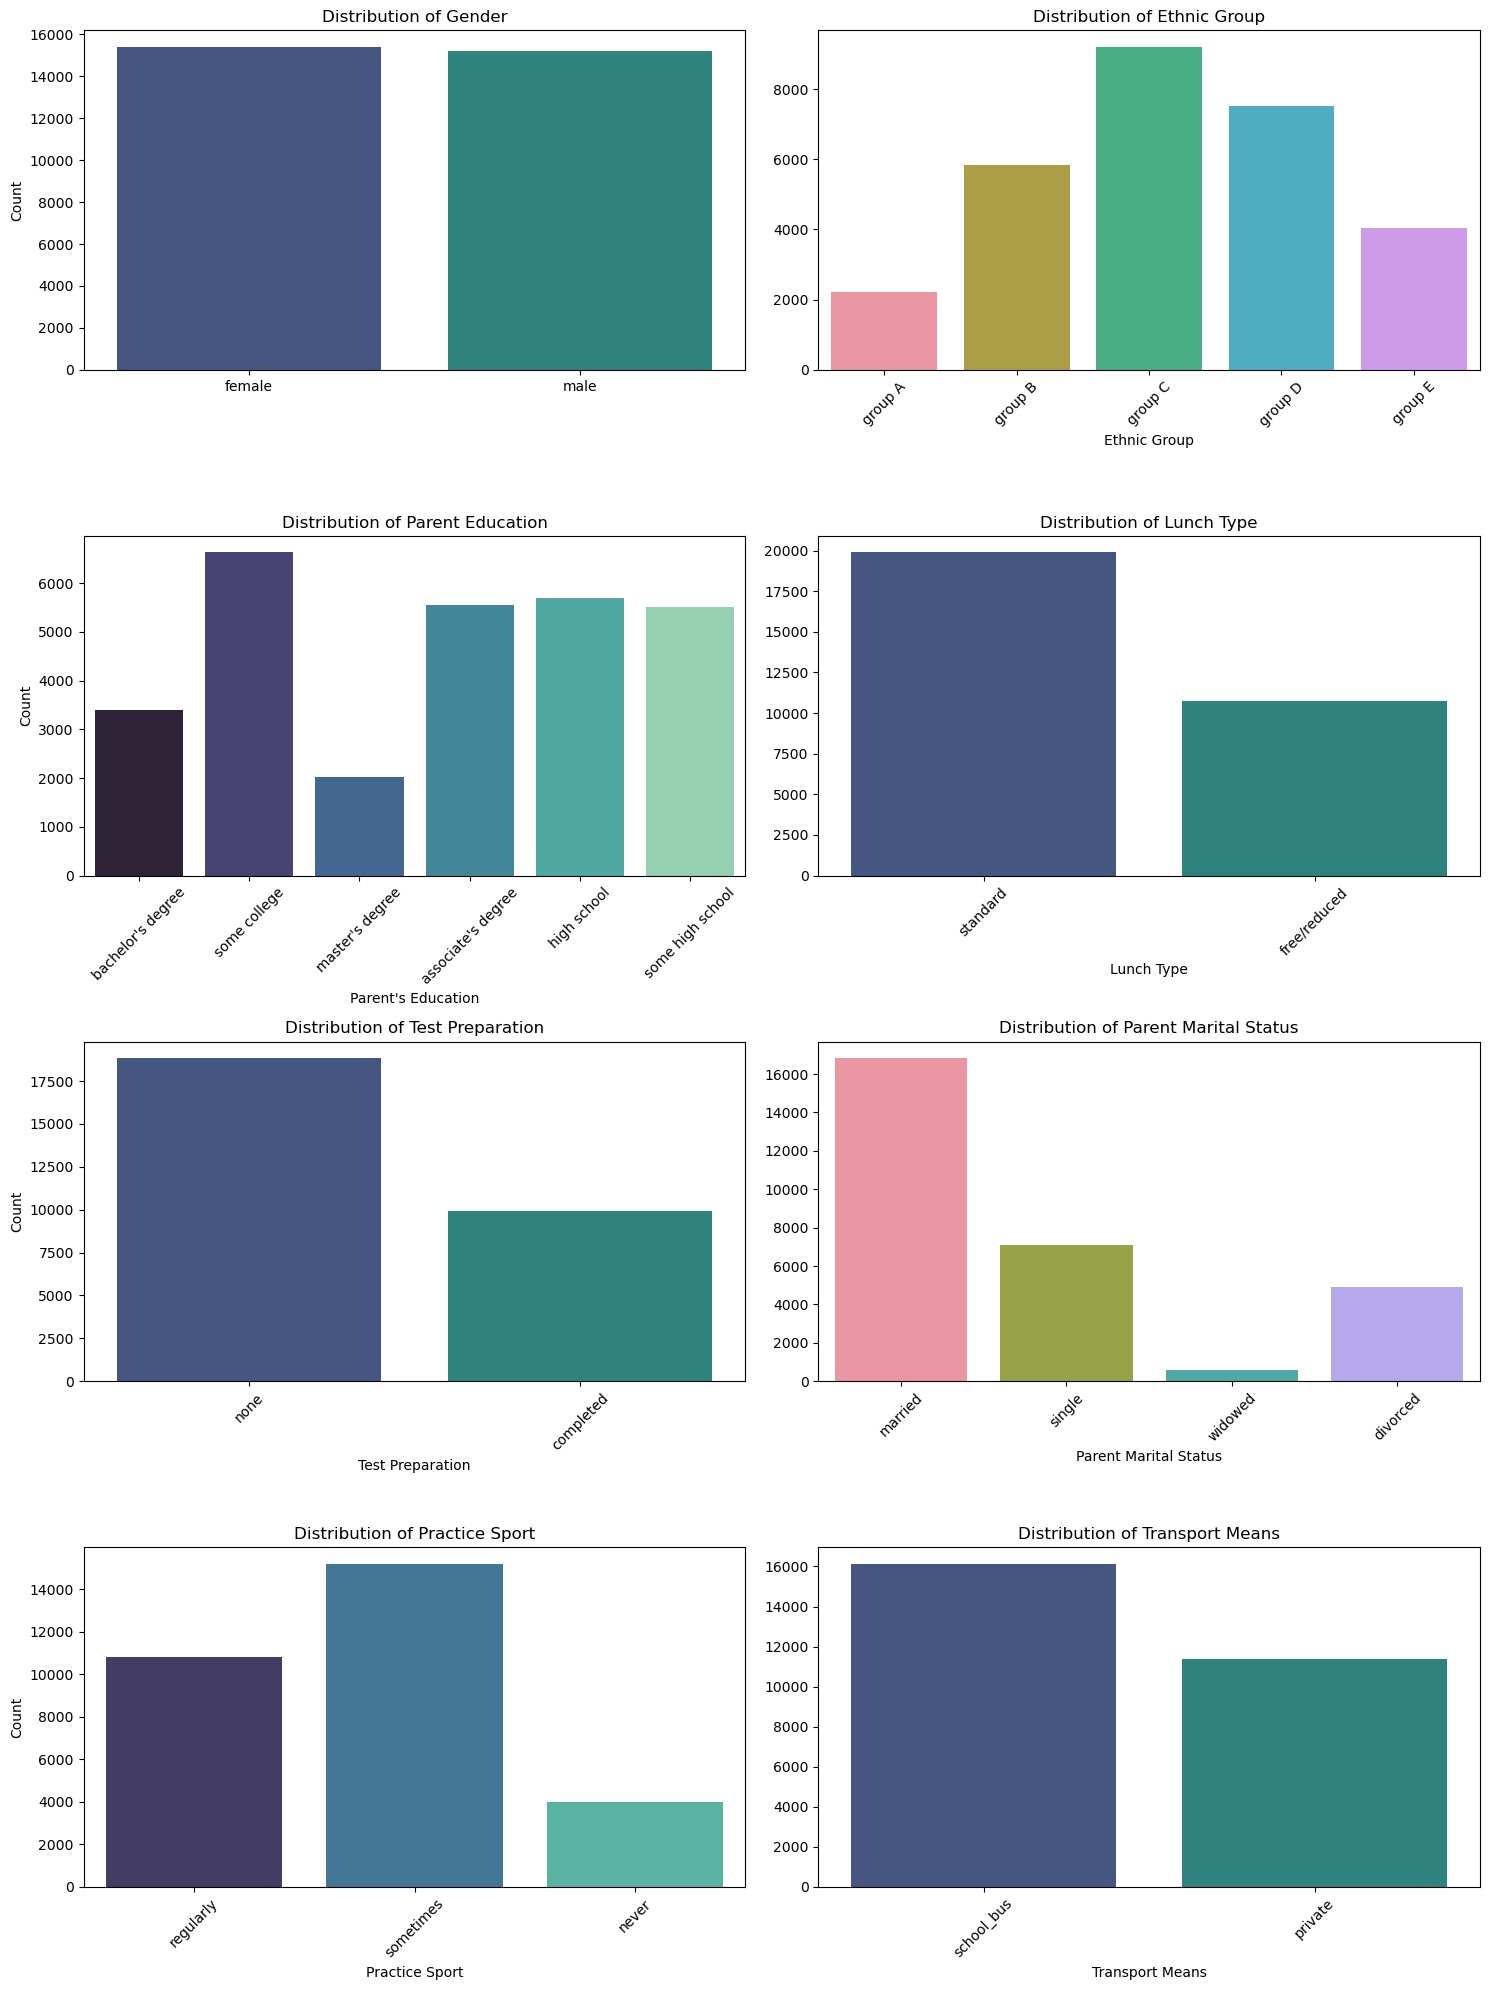

In [6]:
# Generative AI been used
# Distributions of categorical variables
# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Gender
sns.countplot(data=Students_Exam_Scores_df, x='Gender', ax=axes[0, 0])
axes[0, 0].set(xlabel='', ylabel='Count', title='Distribution of Gender')

# EthnicGroup
sns.countplot(data=Students_Exam_Scores_df, x='EthnicGroup',
              order=sorted(Students_Exam_Scores_df['EthnicGroup'].dropna().unique()), ax=axes[0, 1])
axes[0, 1].set(xlabel='Ethnic Group', ylabel='', title='Distribution of Ethnic Group')
axes[0, 1].tick_params(axis='x', rotation=45)

# ParentEduc
sns.countplot(data=Students_Exam_Scores_df, x='ParentEduc', palette='mako', ax=axes[1, 0])
axes[1, 0].set(xlabel="Parent's Education", ylabel='Count', title='Distribution of Parent Education')
axes[1, 0].tick_params(axis='x', rotation=45)

# LunchType
sns.countplot(data=Students_Exam_Scores_df, x='LunchType', ax=axes[1, 1])
axes[1, 1].set(xlabel='Lunch Type', ylabel='', title='Distribution of Lunch Type')
axes[1, 1].tick_params(axis='x', rotation=45)

# TestPrep
sns.countplot(data=Students_Exam_Scores_df, x='TestPrep', ax=axes[2, 0])
axes[2, 0].set(xlabel='Test Preparation', ylabel='Count', title='Distribution of Test Preparation')
axes[2, 0].tick_params(axis='x', rotation=45)

# ParentMaritalStatus
sns.countplot(data=Students_Exam_Scores_df, x='ParentMaritalStatus', ax=axes[2, 1])
axes[2, 1].set(xlabel='Parent Marital Status', ylabel='', title='Distribution of Parent Marital Status')
axes[2, 1].tick_params(axis='x', rotation=45)

# PracticeSport
sns.countplot(data=Students_Exam_Scores_df, x='PracticeSport',  palette='mako', ax=axes[3, 0])
axes[3, 0].set(xlabel='Practice Sport', ylabel='Count', title='Distribution of Practice Sport')
axes[3, 0].tick_params(axis='x', rotation=45)

# TransportMeans
sns.countplot(data=Students_Exam_Scores_df, x='TransportMeans', ax=axes[3, 1])
axes[3, 1].set(xlabel='Transport Means', ylabel='', title='Distribution of Transport Means')
axes[3, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- The gender distribution in the dataset is nearly equal, minimizing the potential impact of gender-based biases on analysis.
- Ethnic Group C dominates the dataset, Ethnic Group D follows closely, and Ethnic Group A is the least represented, indicating disparities among groups that could affect academic performance analysis.
- Parental education distribution reveals that most parents completed high school or have some college education, with fewer holding advanced degrees, potentially limiting representation of higher-educated parents.
- Married parents are the majority, followed by those in relationships, while widowed parents are the least represented, offering insights into family structures of students.
- A significant number of students participate in sports to varying extents, aligning with the emphasis on physical activity in educational settings.
- Most students did not complete test preparation, suggesting room for enhancing student engagement in preparation activities.
- The school bus is the primary transport for students, which could influence attendance and punctuality factors.
- Standard lunch type outnumbers free/reduced lunch, hinting at possible socio-economic correlations impacting academic performance.

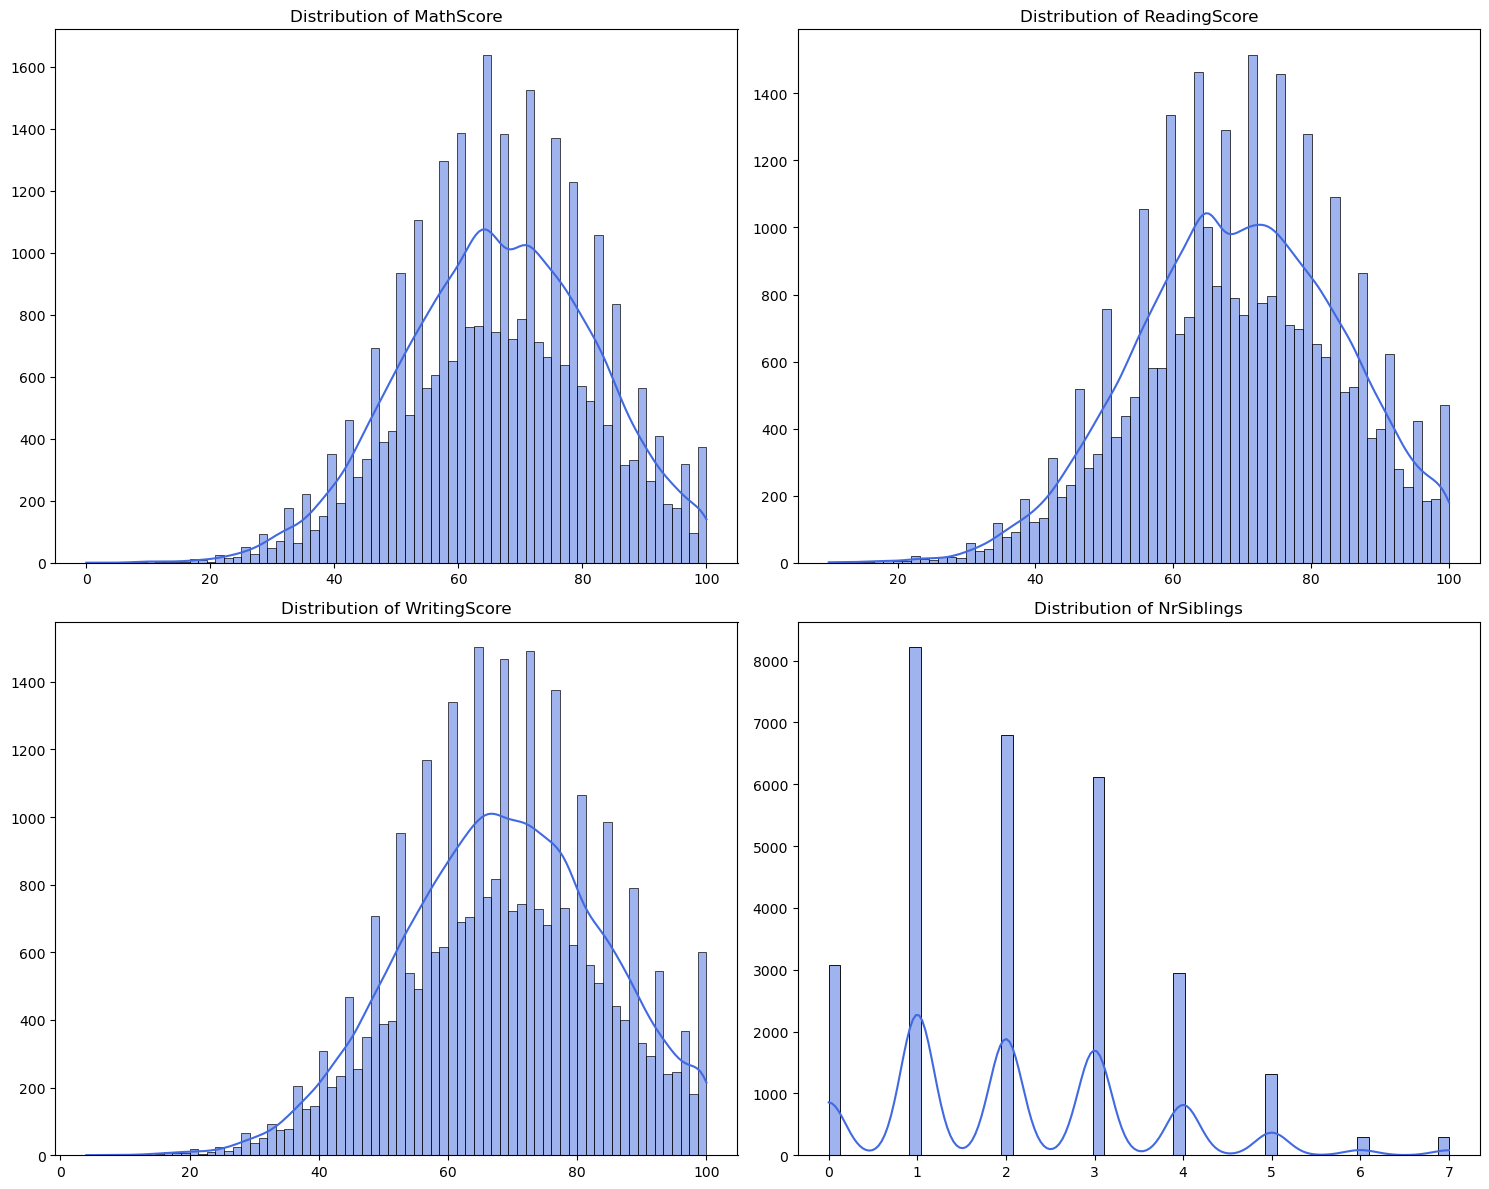

In [7]:
# Distributions of continuous variables
# Select numeric columns
numeric_columns = ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']

# Set up subplots
num_cols = 2
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols
plt.figure(figsize=(15, 12))

# Create distribution plots for numeric columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    ax = sns.histplot(data=Students_Exam_Scores_df, x=column, kde=True, color='royalblue')
    ax.set(xlabel=column, ylabel='Frequency', title=f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

- The MathScore follows a normal distribution centered around 65, indicating a balanced distribution of math performance among students.

- The ReadingScore also exhibits a normal distribution with a mean around 70, suggesting a consistent distribution of reading scores across the student population.

- Similarly, the WritingScore demonstrates a normal distribution centered around 70, implying a relatively uniform distribution of writing scores among students.

- The distribution of the number of siblings is discrete and presents a peak at 1 sibling, with the frequency gradually declining as the number of siblings increases to 7, highlighting the varying family sizes within the dataset.

### Visualizing relationships + Feature engineering

After we got a sense of how our variables are distributed, we will show interesting relationships between variables to examine.

It probably makes sense to think of score in the different subjects as the focal variable of interest, so let's visualize relationships of _MathScore, ReadingScore, WritingScore_ with other variables that we think may impact the student

#### Gender

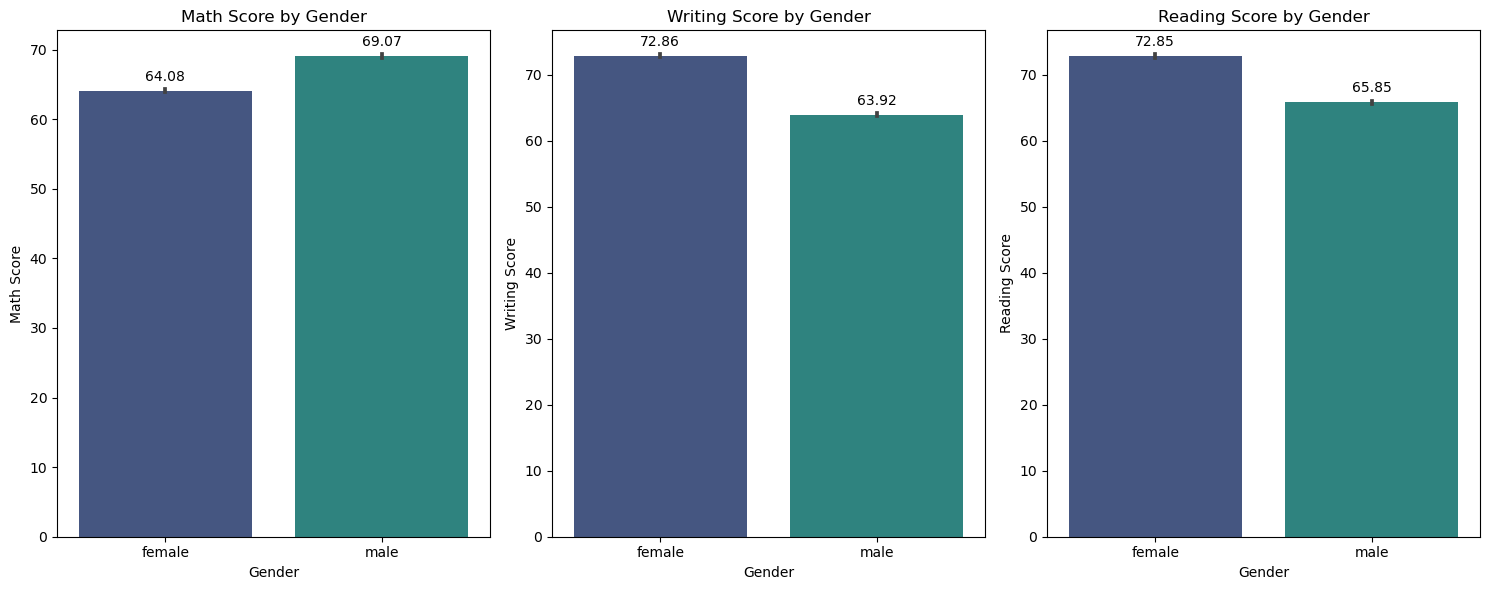

In [8]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by Gender
ax1 = sns.barplot(ax=axes[0], x='Gender', y='MathScore', data=Students_Exam_Scores_df)
ax1.set(xlabel='Gender', ylabel='Math Score', title='Math Score by Gender')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

# WritingScore by Gender
ax2 = sns.barplot(ax=axes[1], x='Gender', y='WritingScore', data=Students_Exam_Scores_df)
ax2.set(xlabel='Gender', ylabel='Writing Score', title='Writing Score by Gender')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

# ReadingScore by Gender
ax3 = sns.barplot(ax=axes[2], x='Gender', y='ReadingScore', data=Students_Exam_Scores_df)
ax3.set(xlabel='Gender', ylabel='Reading Score', title='Reading Score by Gender')
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

plt.tight_layout()
plt.show()

- Females have higher achievement in Reading and Writing while in Math the higher achievements found in Males.
- Overall the difference in scores for each subjects between genders is in range of not more then 10 points.
#### Ethnic Group

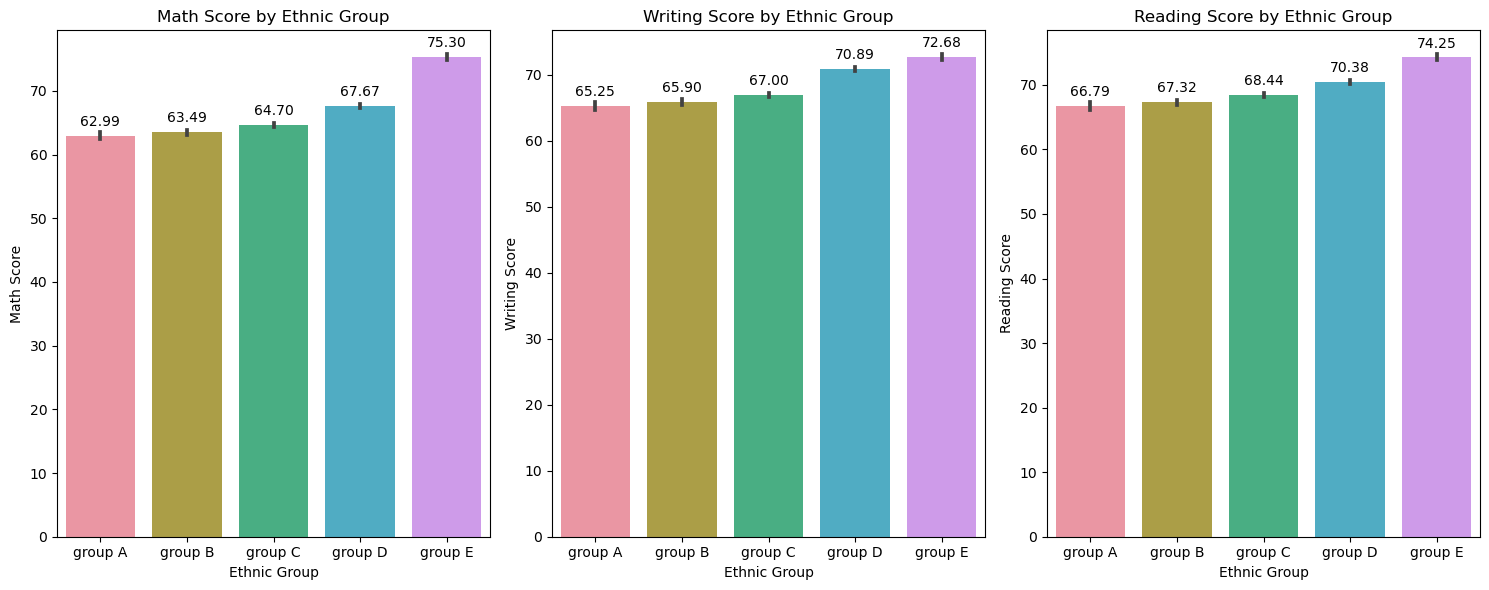

In [9]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by EthnicGroup
ax1 = sns.barplot(ax=axes[0], x='EthnicGroup', y='MathScore', data=Students_Exam_Scores_df,
                  order=sorted(Students_Exam_Scores_df['EthnicGroup'].dropna().unique()))
ax1.set(xlabel='Ethnic Group', ylabel='Math Score', title='Math Score by Ethnic Group')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by EthnicGroup
ax2 = sns.barplot(ax=axes[1], x='EthnicGroup', y='WritingScore', data=Students_Exam_Scores_df,
                  order=sorted(Students_Exam_Scores_df['EthnicGroup'].dropna().unique()))
ax2.set(xlabel='Ethnic Group', ylabel='Writing Score', title='Writing Score by Ethnic Group')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by EthnicGroup
ax3 = sns.barplot(ax=axes[2], x='EthnicGroup', y='ReadingScore', data=Students_Exam_Scores_df,
                  order=sorted(Students_Exam_Scores_df['EthnicGroup'].dropna().unique()))
ax3.set(xlabel='Ethnic Group', ylabel='Reading Score', title='Reading Score by Ethnic Group')
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

It seems that students from EthnicGroup 'A' tend to have lower scores on average, while students from EthnicGroup 'E' tend to have higher scores on average.<br> This observation could potentially suggest that there's a relationship between the 'EthnicGroup' and the academic performance of students.
#### Parent Education

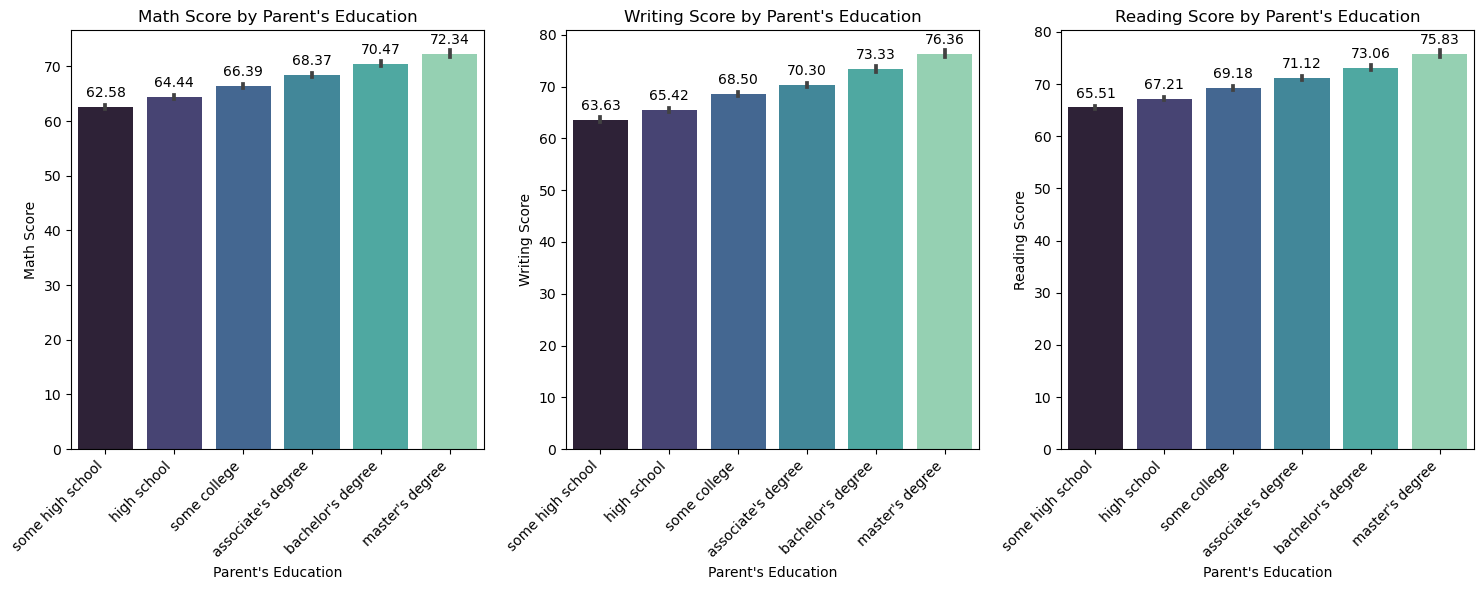

In [10]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Order ParentEduc values from least to most educated
parent_educ_order = Students_Exam_Scores_df.groupby('ParentEduc').mean().sort_values('MathScore').index

# MathScore by ParentEduc
ax1 = sns.barplot(ax=axes[0], x='ParentEduc', y='MathScore', data=Students_Exam_Scores_df,
                   order=parent_educ_order, palette='mako')
ax1.set(xlabel="Parent's Education", ylabel='Math Score', title="Math Score by Parent's Education")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by ParentEduc
ax2 = sns.barplot(ax=axes[1], x='ParentEduc', y='WritingScore', data=Students_Exam_Scores_df,
                   order=parent_educ_order, palette='mako')
ax2.set(xlabel="Parent's Education", ylabel='Writing Score', title="Writing Score by Parent's Education")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by ParentEduc
ax3 = sns.barplot(ax=axes[2], x='ParentEduc', y='ReadingScore', data=Students_Exam_Scores_df,
                   order=parent_educ_order, palette='mako')
ax3.set(xlabel="Parent's Education", ylabel='Reading Score', title="Reading Score by Parent's Education")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

A notable trend emerges from the visualizations, revealing a positive correlation between parent education levels and student scores.<br>
Specifically, as parent education levels increase from "some high school" to "master's degree," student scores in math, writing, and reading subjects also exhibit an upward trend.<br>
This observation suggests a potential influence of parental educational background on their children's academic performance
#### Lunch Type

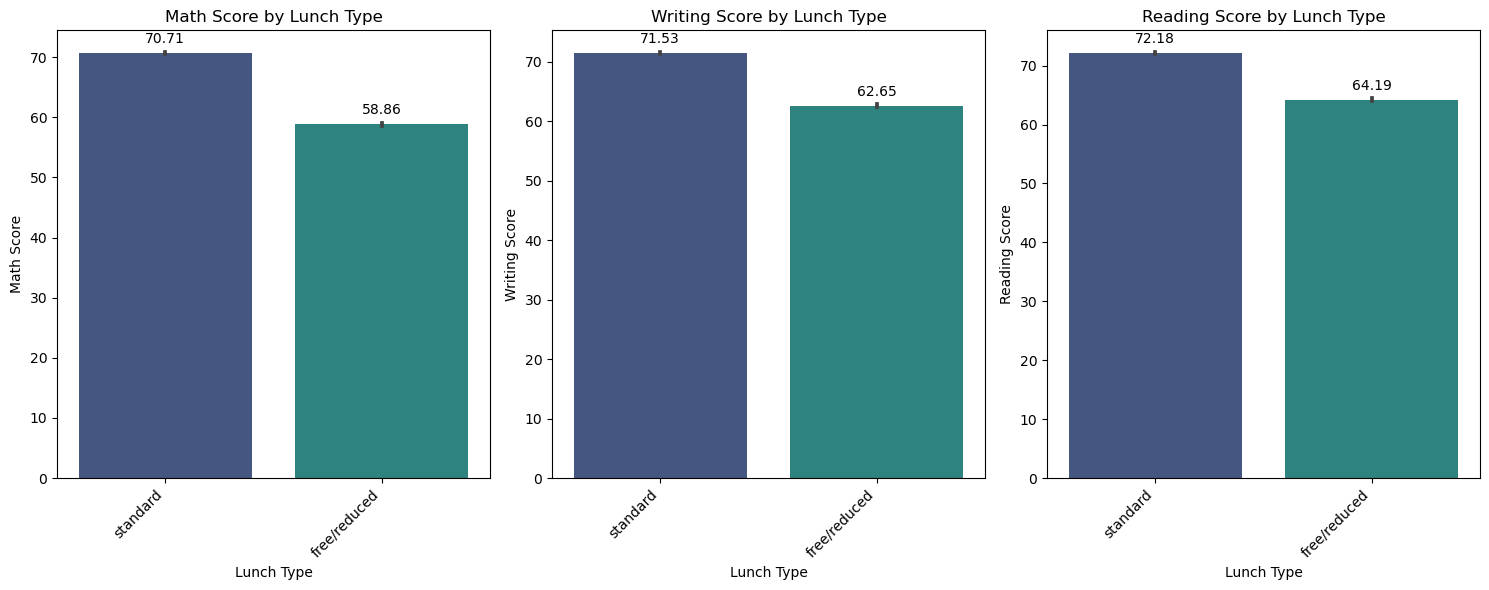

In [11]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by LunchType
ax1 = sns.barplot(ax=axes[0], x='LunchType', y='MathScore', data=Students_Exam_Scores_df)
ax1.set(xlabel='Lunch Type', ylabel='Math Score', title='Math Score by Lunch Type')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by LunchType
ax2 = sns.barplot(ax=axes[1], x='LunchType', y='WritingScore', data=Students_Exam_Scores_df)
ax2.set(xlabel='Lunch Type', ylabel='Writing Score', title='Writing Score by Lunch Type')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by LunchType
ax3 = sns.barplot(ax=axes[2], x='LunchType', y='ReadingScore', data=Students_Exam_Scores_df)
ax3.set(xlabel='Lunch Type', ylabel='Reading Score', title='Reading Score by Lunch Type')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

- We observed that students who receive reduced or free lunch tend to have lower scores compared to students who have standard lunch across all subjects. 
- This observation could indicate a potential socioeconomic factor influencing students' academic performance. 
#### Test Preparation

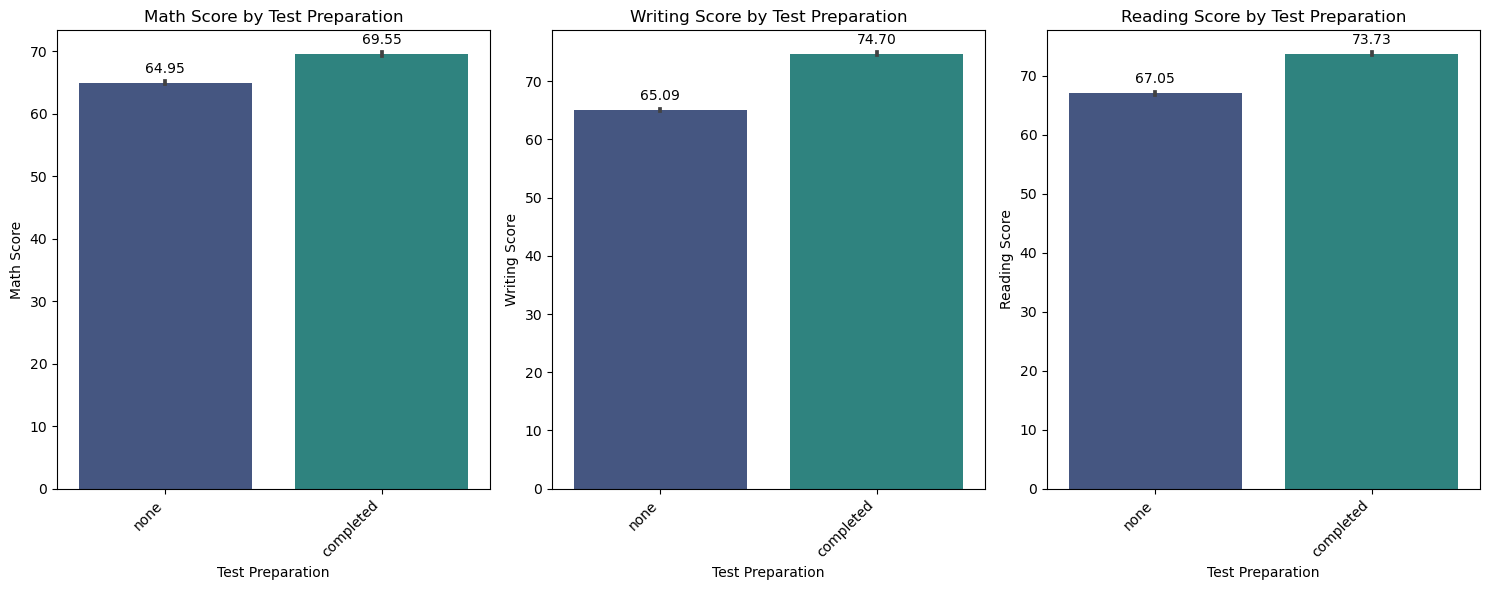

In [12]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by TestPrep
ax1 = sns.barplot(ax=axes[0], x='TestPrep', y='MathScore', data=Students_Exam_Scores_df)
ax1.set(xlabel='Test Preparation', ylabel='Math Score', title='Math Score by Test Preparation')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by TestPrep
ax2 = sns.barplot(ax=axes[1], x='TestPrep', y='WritingScore', data=Students_Exam_Scores_df)
ax2.set(xlabel='Test Preparation', ylabel='Writing Score', title='Writing Score by Test Preparation')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by TestPrep
ax3 = sns.barplot(ax=axes[2], x='TestPrep', y='ReadingScore', data=Students_Exam_Scores_df)
ax3.set(xlabel='Test Preparation', ylabel='Reading Score', title='Reading Score by Test Preparation')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

We observed relationship between test preparation and subject scores reveals a notable trend.<br>
Students who underwent test preparation exhibit consistently higher scores across all subjects: Math, Writing, and Reading, compared to students who did not engage in any test preparation.<br>
This trend strongly suggests that test preparation plays a significant role in enhancing student performance, as reflected in their academic achievements.
#### Parent Marital Status

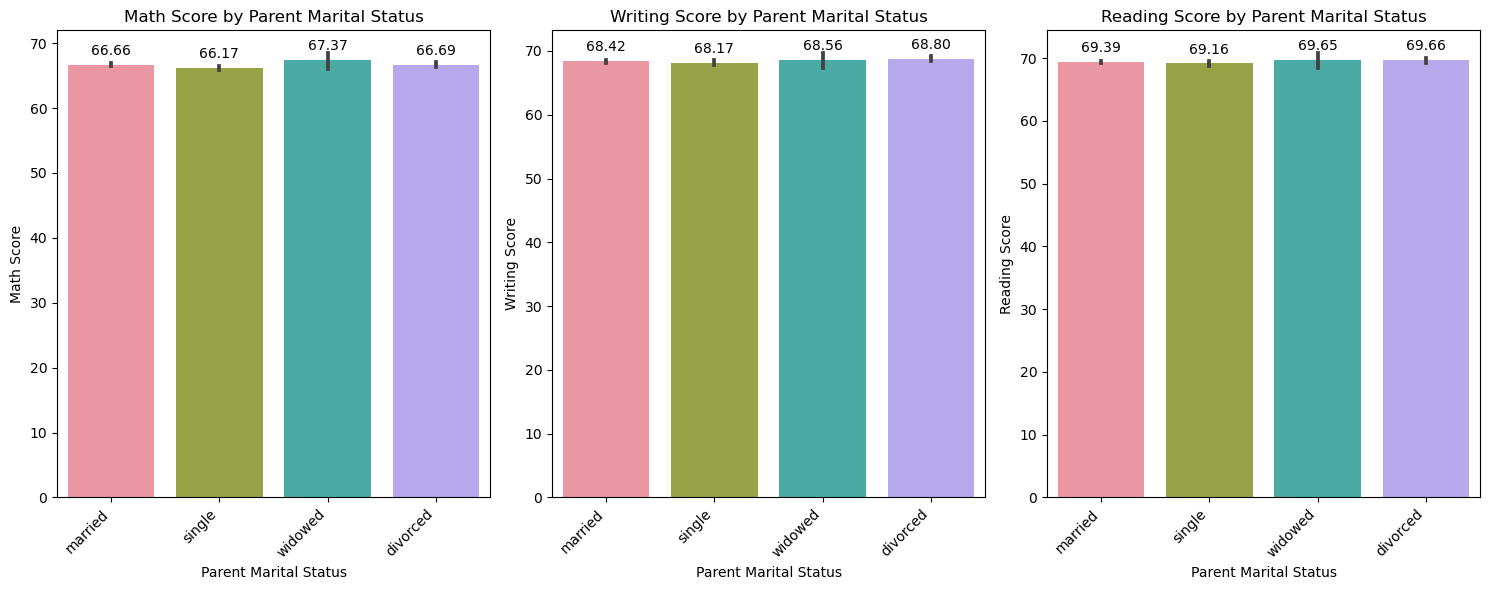

In [13]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by ParentMaritalStatus
ax1 = sns.barplot(ax=axes[0], x='ParentMaritalStatus', y='MathScore', data=Students_Exam_Scores_df)
ax1.set(xlabel='Parent Marital Status', ylabel='Math Score', title='Math Score by Parent Marital Status')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by ParentMaritalStatus
ax2 = sns.barplot(ax=axes[1], x='ParentMaritalStatus', y='WritingScore', data=Students_Exam_Scores_df)
ax2.set(xlabel='Parent Marital Status', ylabel='Writing Score', title='Writing Score by Parent Marital Status')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by ParentMaritalStatus
ax3 = sns.barplot(ax=axes[2], x='ParentMaritalStatus', y='ReadingScore', data=Students_Exam_Scores_df)
ax3.set(xlabel='Parent Marital Status', ylabel='Reading Score', title='Reading Score by Parent Marital Status')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

It seems there is no relation between parental martial status and students score across all subjects.
#### Practice Sport

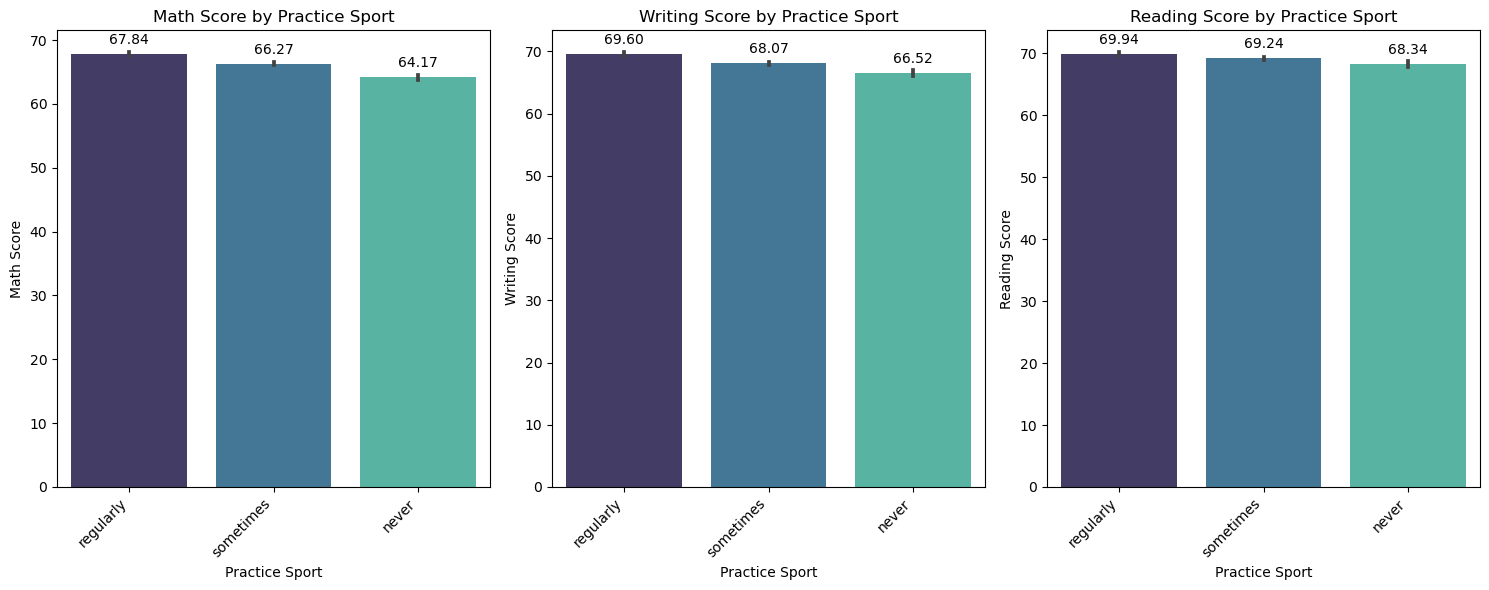

In [14]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by PracticeSport
ax1 = sns.barplot(ax=axes[0], x='PracticeSport', y='MathScore', data=Students_Exam_Scores_df, palette='mako')
ax1.set(xlabel='Practice Sport', ylabel='Math Score', title='Math Score by Practice Sport')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by PracticeSport
ax2 = sns.barplot(ax=axes[1], x='PracticeSport', y='WritingScore', data=Students_Exam_Scores_df, palette='mako')
ax2.set(xlabel='Practice Sport', ylabel='Writing Score', title='Writing Score by Practice Sport')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by PracticeSport
ax3 = sns.barplot(ax=axes[2], x='PracticeSport', y='ReadingScore', data=Students_Exam_Scores_df, palette='mako')
ax3.set(xlabel='Practice Sport', ylabel='Reading Score', title='Reading Score by Practice Sport')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

Upon analyzing the data, a trend emerges indicating a weak positive association between regular practice of sports and higher scores in all subjects.<br>
Students who engage in sports regularly tend to achieve higher Math, Writing, and Reading scores compared to their peers who practice sports less frequently.
#### Is First Child

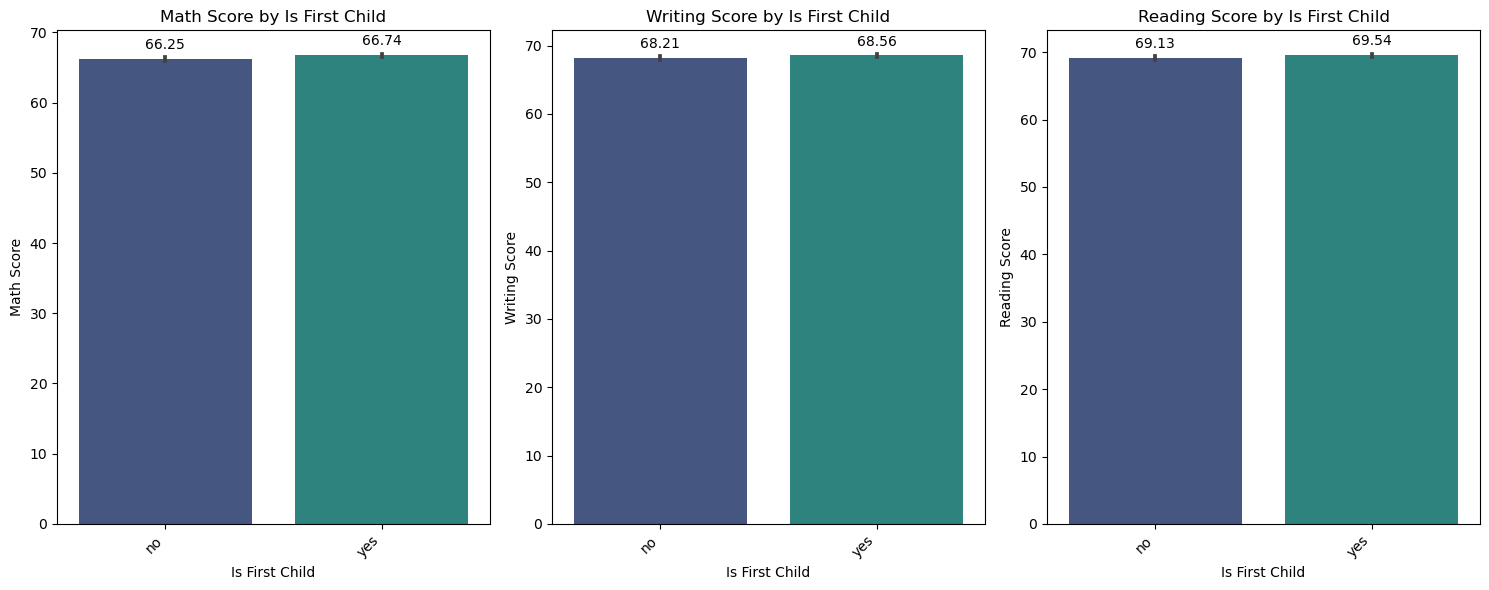

In [15]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by IsFirstChild
ax1 = sns.barplot(ax=axes[0], x='IsFirstChild', y='MathScore', data=Students_Exam_Scores_df, order=['no', 'yes'])
ax1.set(xlabel='Is First Child', ylabel='Math Score', title='Math Score by Is First Child')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by IsFirstChild
ax2 = sns.barplot(ax=axes[1], x='IsFirstChild', y='WritingScore', data=Students_Exam_Scores_df, order=['no', 'yes'])
ax2.set(xlabel='Is First Child', ylabel='Writing Score', title='Writing Score by Is First Child')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by IsFirstChild
ax3 = sns.barplot(ax=axes[2], x='IsFirstChild', y='ReadingScore', data=Students_Exam_Scores_df, order=['no', 'yes'])
ax3.set(xlabel='Is First Child', ylabel='Reading Score', title='Reading Score by Is First Child')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

It seems there is no relation between the student being first child and students score across all subjects.
#### Transport Means

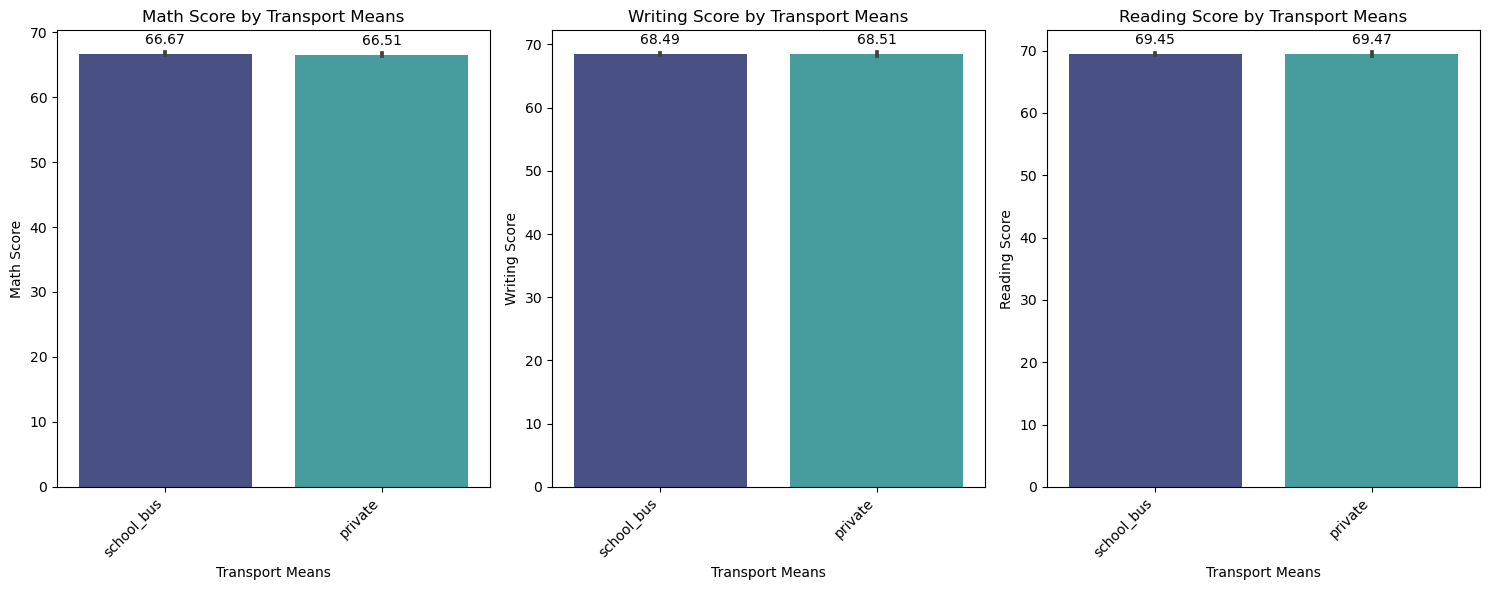

In [16]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# MathScore by TransportMeans
ax1 = sns.barplot(ax=axes[0], x='TransportMeans', y='MathScore', data=Students_Exam_Scores_df,
                  palette='mako')
ax1.set(xlabel='Transport Means', ylabel='Math Score', title='Math Score by Transport Means')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# WritingScore by TransportMeans
ax2 = sns.barplot(ax=axes[1], x='TransportMeans', y='WritingScore', data=Students_Exam_Scores_df,
                  palette='mako')
ax2.set(xlabel='Transport Means', ylabel='Writing Score', title='Writing Score by Transport Means')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# ReadingScore by TransportMeans
ax3 = sns.barplot(ax=axes[2], x='TransportMeans', y='ReadingScore', data=Students_Exam_Scores_df,
                  palette='mako')
ax3.set(xlabel='Transport Means', ylabel='Reading Score', title='Reading Score by Transport Means')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

It seems there is no relation between the student transport means and students score across all subjects.
#### 'Number of Siblings'

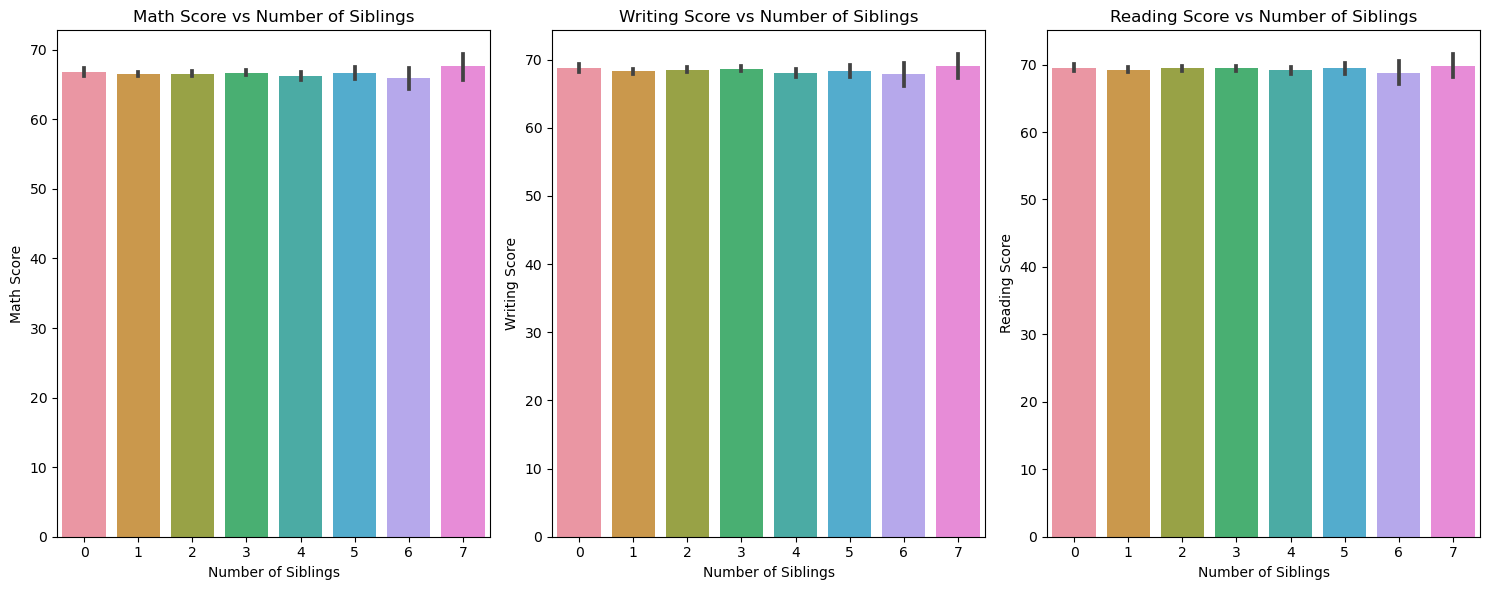

In [17]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Remove rows with null values in 'Number of Siblings' column
data_without_null = Students_Exam_Scores_df.dropna(subset=['NrSiblings'])

# Bar chart of Number of Siblings vs MathScore
sns.barplot(ax=axes[0], x='NrSiblings', y='MathScore', data=data_without_null)
axes[0].set(xlabel='Number of Siblings', ylabel='Math Score', title='Math Score vs Number of Siblings')

# Bar chart of Number of Siblings vs WritingScore
sns.barplot(ax=axes[1], x='NrSiblings', y='WritingScore', data=data_without_null)
axes[1].set(xlabel='Number of Siblings', ylabel='Writing Score', title='Writing Score vs Number of Siblings')

# Bar chart of Number of Siblings vs ReadingScore
sns.barplot(ax=axes[2], x='NrSiblings', y='ReadingScore', data=data_without_null)
axes[2].set(xlabel='Number of Siblings', ylabel='Reading Score', title='Reading Score vs Number of Siblings')

plt.tight_layout()
plt.show()


It seems there is no relation between the student number of siblings and students score across all subjects.

### Missing values

- We need to handle the missing values in *EthnicGroup*, *ParentEduc*, *TestPrep*,*ParentMaritalStatus*, *PracticeSport*, *IsFirstChild*, *NrSiblings*, *TransportMeans*, *WklyStudyHours*
- The categories *ParentMaritalStatus*, *IsFirstChild* and *NrSiblings*have little to no effect on students scores in all subject according to previous analysis so we will not deal with there missing values

### Number of missing values in each category (quantity and percentage):

In [18]:
# Calculate the number of missing values for each category
missing_values_count = Students_Exam_Scores_df[['EthnicGroup', 'ParentEduc', 'TestPrep',
                                                'PracticeSport', 'TransportMeans', 'WklyStudyHours']].isnull().sum()

# Calculate the percentage of missing values for each category
total_rows = Students_Exam_Scores_df.shape[0]
missing_values_percentage = (missing_values_count / total_rows) * 100

# Combine the counts and percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Display the missing data information
print(missing_data)

                Missing Values  Percentage (%)
EthnicGroup               1840        6.005026
ParentEduc                1845        6.021344
TestPrep                  1830        5.972390
PracticeSport              631        2.059332
TransportMeans            3134       10.228126
WklyStudyHours             955        3.116739


In addressing the issue of missing data, an approach worth considering is random imputation with ratio preservation.<br> 
This involves replacing missing values with random selections from the existing distribution within each categorical variable.<br>
Given the relatively small proportion of missing data (up to 10%) and the importance of maintaining the ratio of values within each category, this approach offers a practical solution.<br>
However, it's important to acknowledge that while this method maintains distribution ratios, it may introduce variability and noise, potentially impacting subsequent analyses. <br>

In [19]:
# Generative AI been used
# List of columns with missing values
columns_with_missing = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'PracticeSport', 'TransportMeans', 'WklyStudyHours']

# Print ratios before null switch
print("Ratios before null switch:")
for column in columns_with_missing:
    value_ratios = Students_Exam_Scores_df[column].value_counts(normalize=True)
    print(f"{column}:")
    print(value_ratios)
    print()

# Loop through each column
for column in columns_with_missing:
    # Calculate the ratio of each value in the column
    value_ratios = Students_Exam_Scores_df[column].value_counts(normalize=True)
    
    # Get the indices of missing values in the column
    missing_indices = Students_Exam_Scores_df[Students_Exam_Scores_df[column].isnull()].index
    
    # Generate random values based on the distribution of the column
    random_values = np.random.choice(value_ratios.index, size=len(missing_indices), p=value_ratios.values)
    
    # Assign the random values to the missing indices
    Students_Exam_Scores_df.loc[missing_indices, column] = random_values

# Print number of nulls after switch
print("\nNumber of nulls after switch:")
print(Students_Exam_Scores_df[columns_with_missing].isnull().sum())

# Print ratios after null switch
print("\nRatios after null switch:")
for column in columns_with_missing:
    value_ratios = Students_Exam_Scores_df[column].value_counts(normalize=True)
    print(f"{column}:")
    print(value_ratios)
    print()


Ratios before null switch:
EthnicGroup:
group C    0.319850
group D    0.260512
group B    0.202285
group E    0.140308
group A    0.077046
Name: EthnicGroup, dtype: float64

ParentEduc:
some college          0.230344
high school           0.197493
associate's degree    0.192735
some high school      0.191589
bachelor's degree     0.117586
master's degree       0.070253
Name: ParentEduc, dtype: float64

TestPrep:
none         0.654472
completed    0.345528
Name: TestPrep, dtype: float64

PracticeSport:
sometimes    0.506931
regularly    0.359647
never        0.133422
Name: PracticeSport, dtype: float64

TransportMeans:
school_bus    0.586942
private       0.413058
Name: TransportMeans, dtype: float64

WklyStudyHours:
5 - 10    0.547261
< 5       0.277505
> 10      0.175234
Name: WklyStudyHours, dtype: float64


Number of nulls after switch:
EthnicGroup       0
ParentEduc        0
TestPrep          0
PracticeSport     0
TransportMeans    0
WklyStudyHours    0
dtype: int64

Ratios after 

# Part 3: Estimation and hypothesis testing

- The question we are interesting in to explore: How student achievements (score) in Math, Writhing and Reading subjects changed as a function of the student tendency of practice sport.
- We aim to assess whether the observed weak trend between practicing sports and higher scores across all subjects holds statistical significance. <br>

$H_{0}$:The overall mean (Math, Writhing and Reading) score of students who practice sports is not significantly higher than the average overall mean score of all students.<br>
$H_{1}$: The overall mean score of students who practice sports is significantly higher than the average overall mean score of all students.

**Our approach:** We will generate multiple random samples from the population, maintaining the sample size of our original dataset (*total count of students who practice sports*), to preserve the variation properties.<br>
In each sample, we will calculate the mean score (combining Math, Writing, and Reading) for students who practice sports.<br>
By comparing the distribution of these sample mean scores to the observed mean score for students who practice sports, we can draw conclusions.

In [20]:
total_practice_sport = Students_Exam_Scores_df[Students_Exam_Scores_df['PracticeSport'] != 'never'].shape[0]
print("Total count of students who practice sport:", total_practice_sport)
sample_size = total_practice_sport

Total count of students who practice sport: 26562


### The test statistic:
A test statistic measures the degree of agreement between a sample of data and the null hypothesis.<br>
It contains information about the data that is relevant for deciding whether to reject the null hypothesis. <br> 
**In our case the test statistics is the difference in between overall mean (Math, Writing, and Reading) score of students who practice sports and the overall mean score of all students**

In [21]:
# Calculate the overall mean scores for students who practice sports
overall_mean_practice_sport = Students_Exam_Scores_df.loc[Students_Exam_Scores_df['PracticeSport'] != 'never',
                                                          ['MathScore', 'WritingScore', 'ReadingScore']].mean().mean()

# Calculate the overall mean scores for all students
overall_mean_all_students = Students_Exam_Scores_df[['MathScore', 'WritingScore', 'ReadingScore']].mean().mean()

# Calculate the difference in means
mean_difference = overall_mean_practice_sport - overall_mean_all_students
print("Mean Difference := Test Statistic :", mean_difference)

Mean Difference := Test Statistic : 0.2635750386190381


### Run a simulation and plot the parameter estimation under the null hypothesis. Also mark the test statistic.

In [22]:
# Simulate one value.
def simulate_Students_Exam_Scores_sample():
    random_sample = Students_Exam_Scores_df.sample(n=sample_size, replace=True)
    practice_sports_scores = random_sample[random_sample['PracticeSport']
                                           != 'never'][['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)
    no_practice_sports_scores = random_sample[random_sample['PracticeSport']
                                              == 'never'][['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)
    mean_score_diff = practice_sports_scores.mean() - no_practice_sports_scores.mean()
    return mean_score_diff

# Run multiple simulations
num_sims = 5000
many_mean_score_diff = np.empty(num_sims)
for i in range(num_sims):
    many_mean_score_diff[i] = simulate_Students_Exam_Scores_sample()

p-value: 1.0


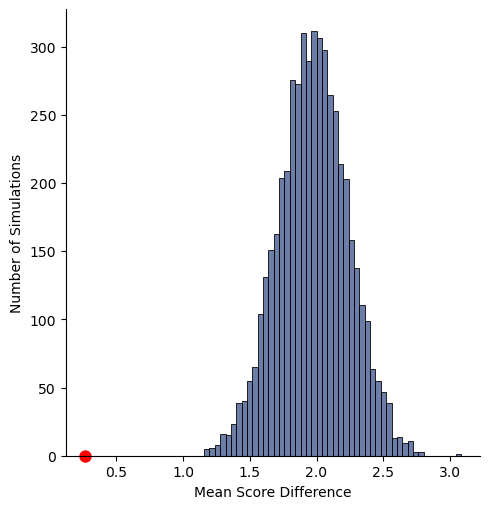

In [23]:
# Compute the p-value
observed_test_statistic = mean_difference
p_value = (np.abs(many_mean_score_diff) >= np.abs(observed_test_statistic)).mean()
print("p-value:", p_value)

# Visualizing the results
ax = sns.displot(many_mean_score_diff)
ax.set(xlabel='Mean Score Difference', ylabel='Number of Simulations')
plt.scatter(observed_test_statistic, 0, marker='.'
            , s=250, color='red', clip_on=False) # Shows red dot where the value of the observed test statistic is
plt.show()

#### Conclusion:
Based on the simulation results and the calculated p-value of 1, we cannot reject the null hypothesis (H0), <br>
and there is no strong indication that practicing sports has a significant impact on the overall mean scores of students in Math, Writing, and Reading subjects.

It's important to note that a high p-value like 1 indicates that the observed test statistic is well within the range of what could be expected under the null hypothesis. As a result,<br>
we don't have enough evidence to support the alternative hypothesis, and any differences in mean scores between the two groups could likely be due to random variability.

# Part 4: Prediction

The most immediate classification task that comes to mind is to predict if a student get a high score or not base on his other features. <br>
Let's now look at the correlations between the variables.<br>
The correlation matrix will not display corrlations with non-numeric variables, so we should first transform the categorical variables to numeric<br> 
(excluding *ParentMaritalStatus*, *IsFirstChild* ,*NrSiblings* and *TransportMeans* since we observed in the data exploration part that those categories are not affecting the student score).<br>
- **Note**: Despite the lack of statistically significant difference in overall mean scores based on the hypothesis testing, the inclusion of the "PracticeSport" feature <br> in the classifier could be justified by considering its potential practical relevance to the overall model's predictive performance.

In [ ]:
# pd.get_dummies
# List of columns to drop
columns_to_drop = ['ParentMaritalStatus', 'IsFirstChild', 'NrSiblings', 'TransportMeans']

# Drop the specified columns
Students_Exam_Scores_df_dummies = Students_Exam_Scores_df.drop(columns=columns_to_drop)

# pd.get_dummies is one way
Students_Exam_Scores_df_dummies = pd.get_dummies(Students_Exam_Scores_df_dummies, 
                                    columns=['Gender','LunchType','EthnicGroup',
                                             'ParentEduc', 'TestPrep', 'PracticeSport', 'WklyStudyHours'])

# Display the modified DataFrame
Students_Exam_Scores_df_dummies.head()


We see the correlations with Math, Writing and Reading are not high, except for *Gender* and *LunchType*, which could be an important predictor.<br>
Other correlations are under 0.3, but based on our analysis so far we would probably like to predict using:

- Gender
- LunchType
- EthnicGroup
- ParentEduc
- TestPrep
- PracticeSport
- WklyStudyHours

Importantly, in transforming the categorical variables to numeric we are making an assumption that the difference between, for example, males and females,<br> should be weighted the same (in terms of distance) as the difference between the different frequency of sport student practicing (if we scale to range) or to a difference of 1 standard deviation of this variable (if we scale to z-scores) etc.

#### Adding the target class fetcher to the Data Frame
Creating a new feature named 'OverallMean,' which represents the average of a student's scores in Math, Writing, and Reading subjects, can significantly enhance our classification model's ability to predict student score success based on other features.<br>
This aggregated feature condenses academic performance information into a single variable, reducing dimensionality and possibly strengthening the model's decision-making process.<br>
By capturing a student's overall academic ability, 'OverallMean' offers a consolidated indicator that might boost its importance in the model and improve generalization to new data.<br>
However, it's crucial to ensure this new feature aligns with the predictive task and complements existing variables effectively. <br> (We will evaluate the effectiveness of the new 'OverallMean' feature by assessing its impact on model accuracy through cross-validation)

In [26]:
# Calculate the overall mean score of all subjects for each student
Students_Exam_Scores_df['OverallMean'] = Students_Exam_Scores_df[['MathScore', 'WritingScore', 'ReadingScore']].mean(axis=1)
Students_Exam_Scores_df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,OverallMean
0,0,female,group E,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,72.000000
1,1,female,group C,some college,standard,none,married,sometimes,yes,0,private,5 - 10,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,private,5 - 10,45,56,42,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75,76.333333


In [27]:
# keeping only the variables we're interested in
knn_df = Students_Exam_Scores_df[['Gender', 'LunchType', 'EthnicGroup', 'ParentEduc', 'TestPrep', 
                     'PracticeSport', 'WklyStudyHours', 'OverallMean']]
display(knn_df)

,Gender,LunchType,EthnicGroup,ParentEduc,TestPrep,PracticeSport,WklyStudyHours,OverallMean
0,female,standard,group E,bachelor's degree,none,regularly,< 5,72.000000
1,female,standard,group C,some college,none,sometimes,5 - 10,82.333333
2,female,standard,group B,master's degree,none,sometimes,< 5,90.333333
3,male,free/reduced,group A,associate's degree,none,never,5 - 10,47.666667
4,male,standard,group C,some college,none,sometimes,5 - 10,76.333333
...,...,...,...,...,...,...,...,...
30636,female,standard,group D,high school,none,sometimes,5 - 10,61.666667
30637,male,standard,group E,high school,none,regularly,5 - 10,54.000000
30638,female,free/reduced,group B,high school,completed,sometimes,5 - 10,66.000000
30639,female,standard,group D,associate's degree,completed,regularly,5 - 10,88.333333


In [28]:
# Generative AI been used
# Define a custom encoding function for 'OverallMean' column
def encode_overall_mean(score):
    if score >= 0 and score <= 79: # 0 incoded for low mean score
        return 0
    elif score > 79 and score <= 100: # 1 incoded for high mean score
        return 1
    else:
        return None

# Apply the encoding function to the 'OverallMean' column
Students_Exam_Scores_df['OverallMean'] = Students_Exam_Scores_df['OverallMean'].apply(encode_overall_mean)

# Select columns for encoding
categorical_columns = ['Gender', 'LunchType', 'EthnicGroup', 'ParentEduc', 'TestPrep', 
                       'PracticeSport', 'WklyStudyHours']

# Transform categorical variables to dummies
knn_df = pd.get_dummies(Students_Exam_Scores_df, columns=categorical_columns)

# Drop specified columns
columns_to_drop = ['ParentMaritalStatus', 'IsFirstChild', 'NrSiblings', 'TransportMeans',
                   'MathScore', 'ReadingScore', 'WritingScore']
knn_df = knn_df.drop(columns=columns_to_drop)

# Display the encoded DataFrame
knn_df.head()

,Unnamed: 0,OverallMean,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,...,ParentEduc_some college,ParentEduc_some high school,TestPrep_completed,TestPrep_none,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,1,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
2,2,1,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
3,3,0,0,1,1,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,4,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0


In [29]:
# Split our data to train and test sets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# shuffle the dataframe first
knn_df = knn_df.sample(frac=1)

# Define your feature columns (X) and target variable (Y)
X = knn_df.loc[:, knn_df.columns != 'OverallMean']  # features
Y = knn_df.loc[:, 'OverallMean'].values  # labels

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train

,Unnamed: 0,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,ParentEduc_some college,ParentEduc_some high school,TestPrep_completed,TestPrep_none,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
27079,877,1,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
20287,583,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
23348,881,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
21078,437,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
6158,498,1,0,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27520,351,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2913,73,1,0,1,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
2932,95,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
16789,853,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0


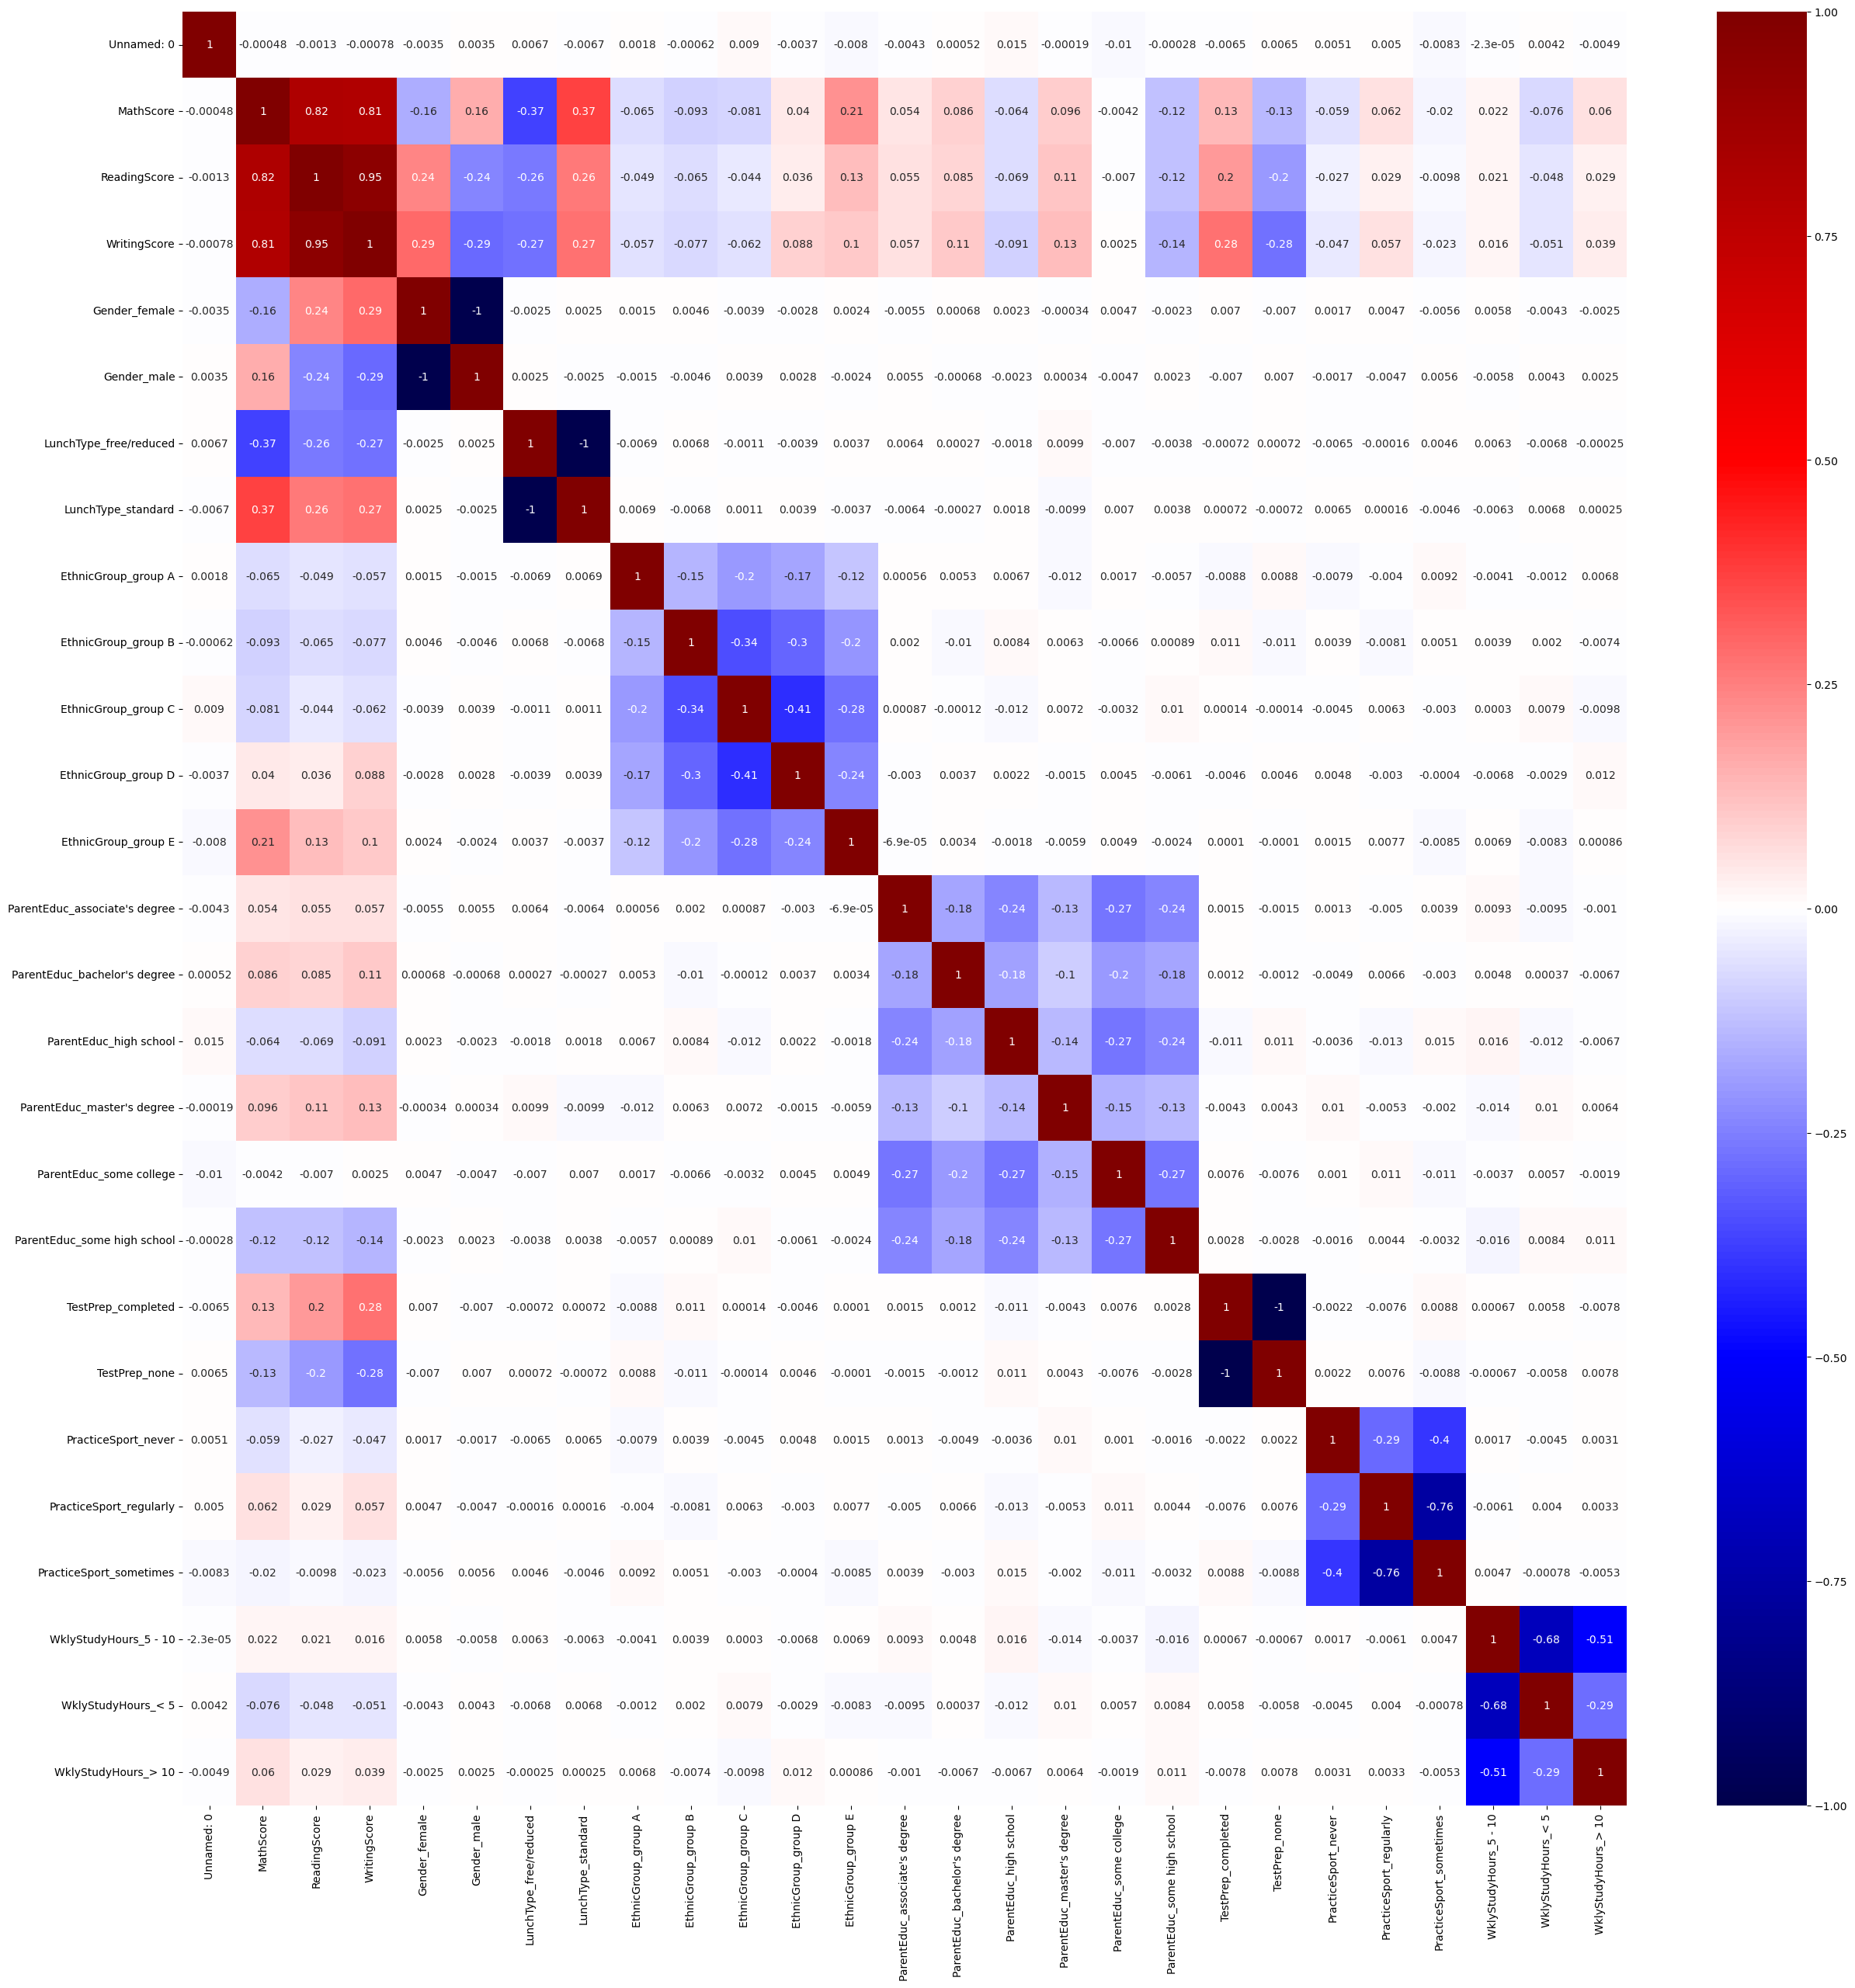

In [25]:
# Compute correlation between each pair of variables in data frame
correlations = Students_Exam_Scores_df_dummies.corr()

# Plot heat map
plt.figure(figsize=(30, 30))
g = sns.heatmap(correlations, annot=True, cmap="seismic")
plt.show()

In [30]:
# We need to scale the variables to be on the same scale
# We choose here to standardize using z-scores
from sklearn.preprocessing import StandardScaler
df_columns = X_train.columns
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
# Difference between scaling the train and the test!
scaled_X_test = scaler.transform(X_test)

scaled_df = pd.DataFrame(scaled_X_train, columns=df_columns)
scaled_df.describe()

,Unnamed: 0,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,ParentEduc_some college,ParentEduc_some high school,TestPrep_completed,TestPrep_none,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
count,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,...,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04,2.451200e+04
mean,8.261451e-17,5.330629e-16,-5.330629e-16,2.973669e-16,-2.973669e-16,-6.837845e-16,-1.496038e-15,9.400027e-16,7.988152e-16,1.374322e-15,...,-2.050597e-16,1.610032e-16,1.938279e-15,-1.938279e-15,2.920278e-15,3.029108e-16,2.948577e-16,1.344750e-16,1.234507e-16,9.346038e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.725280e+00,-1.001633e+00,-9.983695e-01,-7.344443e-01,-1.361574e+00,-2.884646e-01,-5.025867e-01,-6.864548e-01,-5.941240e-01,-4.040418e-01,...,-5.507672e-01,-4.862290e-01,-7.270218e-01,-1.375475e+00,-3.889532e-01,-7.505100e-01,-1.016703e+00,-1.100761e+00,-6.203699e-01,-4.593554e-01
25%,-8.727004e-01,-1.001633e+00,-9.983695e-01,-7.344443e-01,-1.361574e+00,-2.884646e-01,-5.025867e-01,-6.864548e-01,-5.941240e-01,-4.040418e-01,...,-5.507672e-01,-4.862290e-01,-7.270218e-01,-1.375475e+00,-3.889532e-01,-7.505100e-01,-1.016703e+00,-1.100761e+00,-6.203699e-01,-4.593554e-01
50%,5.900291e-04,9.983695e-01,-9.983695e-01,-7.344443e-01,7.344443e-01,-2.884646e-01,-5.025867e-01,-6.864548e-01,-5.941240e-01,-4.040418e-01,...,-5.507672e-01,-4.862290e-01,-7.270218e-01,7.270218e-01,-3.889532e-01,-7.505100e-01,9.835716e-01,9.084621e-01,-6.203699e-01,-4.593554e-01
75%,8.704287e-01,9.983695e-01,1.001633e+00,1.361574e+00,7.344443e-01,-2.884646e-01,-5.025867e-01,1.456760e+00,1.683150e+00,-4.040418e-01,...,-5.507672e-01,-4.862290e-01,1.375475e+00,7.270218e-01,-3.889532e-01,1.332427e+00,9.835716e-01,9.084621e-01,1.611942e+00,-4.593554e-01
max,1.723009e+00,9.983695e-01,1.001633e+00,1.361574e+00,7.344443e-01,3.466630e+00,1.989706e+00,1.456760e+00,1.683150e+00,2.474991e+00,...,1.815649e+00,2.056644e+00,1.375475e+00,7.270218e-01,2.571003e+00,1.332427e+00,9.835716e-01,9.084621e-01,1.611942e+00,2.176964e+00


Highest accuracy is obtained for k = 22 and equals 0.7674199298085875


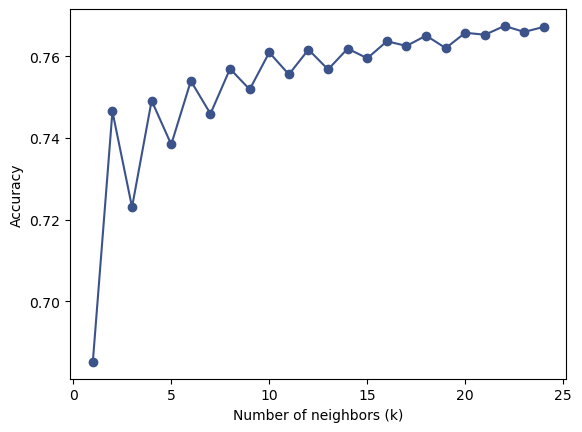

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

mean_cv_scores = []
k_list = range(1, 25)
for nn in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=nn)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # Suppress mode-related FutureWarning
        cv_scores = cross_val_score(knn_cv, scaled_X_train, Y_train, cv=10)
    mean_cv_scores.append(np.mean(cv_scores))
    
# output results
best_k = np.argmax(mean_cv_scores) + 1
print('Highest accuracy is obtained for k =', best_k, 'and equals', max(mean_cv_scores))
plt.plot(k_list, mean_cv_scores, '-o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

# Train the chosen kNN classifier on the whole training data
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(scaled_X_train, Y_train)

# Evaluate the classifier on the test data
accuracy = knn_classifier.score(scaled_X_test, Y_test)
print('Accuracy of the classifier is', accuracy)

# Compute a confusion matrix
predictions = knn_classifier.predict(scaled_X_test)
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1])
print('Confusion matrix:\n', conf_matrix)

precision = precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1])
recall = recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1])
print('Precision:', precision)
print('Recall:', recall)

Accuracy of the classifier is 0.7709251101321586
Confusion matrix:
 [[4489  224]
 [1180  236]]
Precision: 0.5130434782608696
Recall: 0.16666666666666666


#### Conclusion:
Our model demonstrates a satisfactory level of accuracy, although it slightly falls short of the cross-validation (CV) score, a common phenomenon.<br>
The overall accuracy is approximately 80%. However, a notable observation is that our model exhibits a lower recall compared to its precision scores.<br> This implies that its ability to correctly identify positive cases is not as robust as its precision in predicting positive cases.<br>
In other words, the model appears to excel in accurately predicting the positive class but struggles to capture all actual positive instances.